In [2]:
import IPython.display as ipd
import glob
import os

In [21]:
wavs_synth = [wav(p) for p in glob.glob('samples/SYNTH*')]

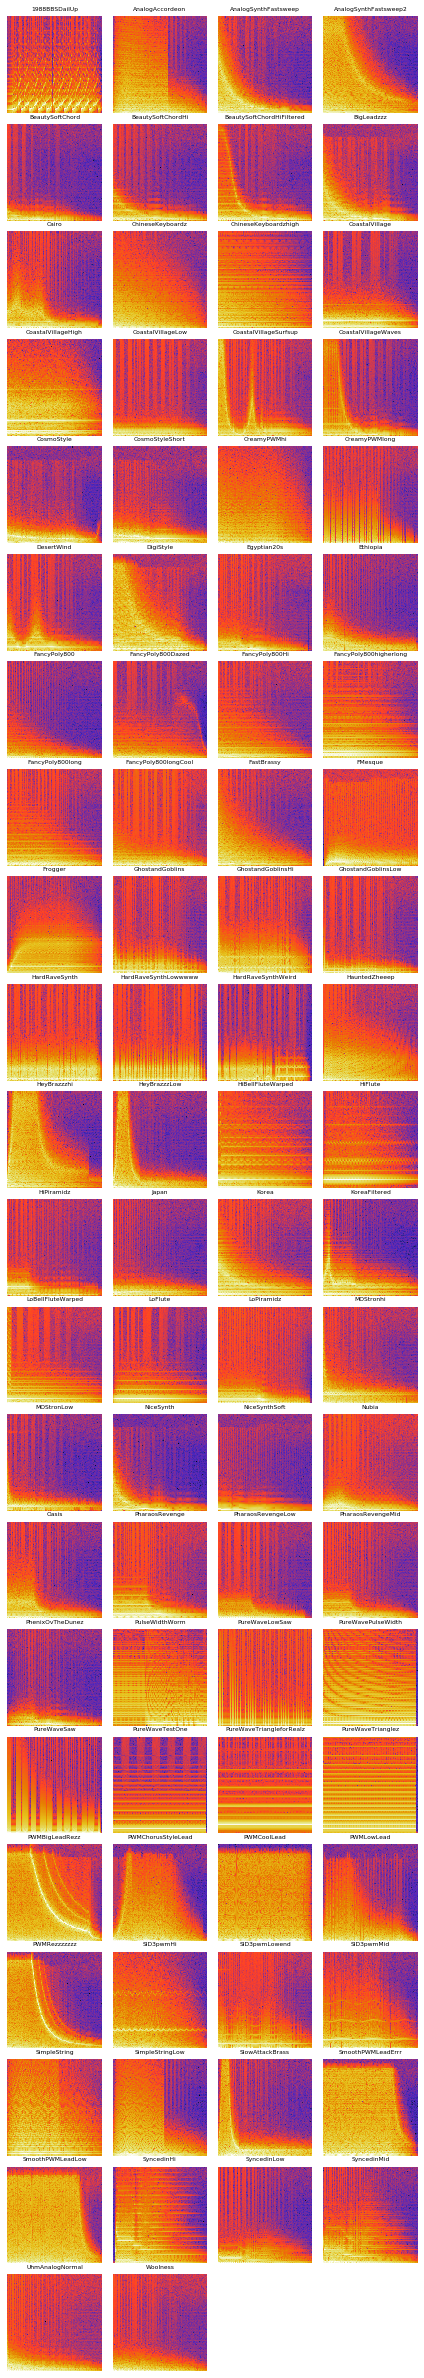

In [26]:
wav.spec_multiple(wavs_synth, wav_names=[x.split('-')[-1].replace('.wav', '') for x in glob.glob('samples/SYNTH*')], cmap='CMRmap', n_cols=4)

In [1]:
%run wav_object

def load_audio(
    glob_path,
    window_size=500,
    file_suffix='.wav',
):
    if glob_path.endswith('/'):
        glob_path += '*'
    if not glob_path.endswith(file_suffix):
        glob_path += '*' + file_suffix
    
    paths = glob.glob(glob_path)
    
    ret = []
    
    for path in paths:
        ret.append(wav(path))
#         w = wav_to_fft(w, window_size)
#         ret.append(w)        
    return ret

def wav_pad_end(w, target):
    return wav(np.pad(w, ((0, max(w.shape[0], target - w.shape[0])), (0,0)), mode='constant')[:target,:])
        
def wav_to_fft(w, window_size=500):
    return w.stft(window_size)

def fft_to_real(w):
    return np.asarray([w.real, w.imag])

def real_to_fft(w):
    return w[0] + 1j*w[1]

def fft_to_wav(w, sample_rate=44100):
    return wav(istft(w, fs=sample_rate)[1])

def process(wavs_raw, window_size=500):
    length = max(map(len, wavs_raw))
    ret = []
    for w in wavs_raw:
        if isinstance(w, wav):
            w = w.data
        ret.append(fft_to_real(wav_to_fft(wav_pad_end(w, length), window_size)))
    return np.asarray(ret)
        
def iprocess(wavs_processed, wavs_raw=None, sample_rate=44100):
    ret = []
    if wavs_raw is None:
        sizes = list(map(lambda x: x.shape[2], wavs_processed))
    else:
        sizes = list(map(len, wavs_raw))
    for w,s in zip(wavs_processed, sizes):
        ret.append(fft_to_wav(real_to_fft(w))[:s])
    return ret

raw = load_audio('samples/BASS*')
data = process(raw, window_size=100)
# raw = iprocess(proc, data)
# fft = wav_to_fft(data, 100)
# real = fft_to_real(fft)
# fft2 = real_to_fft(real)

# print((list(fft2) == list(fft)).all())


IndentationError: expected an indented block (wav_object.py, line 25)

NameError: name 'glob' is not defined

In [130]:
import keras
n_samples = data.shape[0]
print(data.shape[1:])
inputs = keras.layers.Input(shape=data.shape[1:])
conv = keras.layers.Conv2D(filters=5, kernel_size=(2,5), strides=(2,5))(inputs)
outputs = keras.layers.Deconv2D(filters=data.shape[-1], kernel_size=(2,5), strides=(2,5), output_padding=(0,1))(conv)

encoder = keras.models.Model(inputs=inputs,outputs=conv)
ae = keras.models.Model(inputs=inputs, outputs=outputs)

(2, 51, 4179)


In [145]:

ae.compile(optimizer='adam', loss='mae')
norm = (data - data.min(axis=0))/(data.max(axis=0) - data.min(axis=0))

ae.fit(
    x=norm,
    y=norm,
    epochs=5
)

Epoch 1/5
54/54 [==============================] - 4s 68ms/step - loss: nan
Epoch 2/5
54/54 [==============================] - 4s 65ms/step - loss: nan
Epoch 3/5
54/54 [==============================] - 3s 48ms/step - loss: nan
Epoch 4/5
54/54 [==============================] - 3s 47ms/step - loss: nan
Epoch 5/5
54/54 [==============================] - 2s 45ms/step - loss: nan


In [148]:
np.nan_to_num(norm, 0).max()

1.0

In [137]:
recon = ae.predict(data)

array([[[[ 1.18334342e-06,  3.79645666e-04, -3.08800421e-04, ...,
           3.36306286e-04,  1.03070946e-04,  4.24376449e-05],
         [-2.62366046e-05,  3.71126139e-04, -2.53379898e-04, ...,
           2.92664452e-04,  9.56503354e-05,  7.46413498e-05],
         [-9.12745167e-06,  3.23175831e-04, -2.36284394e-04, ...,
           2.66315503e-04,  1.38722127e-04,  4.55959489e-05],
         ...,
         [-4.76440418e-05,  3.58415736e-04, -2.24166150e-04, ...,
           2.50997080e-04,  5.03676820e-05,  3.27625676e-05],
         [-3.75434080e-05,  3.45837532e-04, -2.20512601e-04, ...,
           2.50162644e-04,  4.44536454e-05,  2.91176511e-05],
         [-4.53021056e-05,  3.50691873e-04, -2.16242634e-04, ...,
           2.54539016e-04,  4.95782369e-05,  2.89572272e-05]],

        [[-1.12154856e-04,  2.70691264e-04, -2.59969034e-04, ...,
           2.83729198e-04,  6.98637596e-05,  1.88248523e-05],
         [-6.30442955e-05,  3.12667690e-04, -9.40315024e-05, ...,
           3.37642094e

In [132]:
out = ae.predict(data)

In [133]:
out.shape, data.shape

((54, 2, 51, 4179), (54, 2, 51, 4179))

In [134]:
recon = fft_to_wav(real_to_fft(fft_to_real(wav_to_fft(elt))))

NameError: name 'elt' is not defined

In [8]:
d = elt.data

In [28]:
target = 100000


array([[ 9.15527344e-05],
       [-1.22070312e-04],
       [-9.15527344e-05],
       ...,
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])

In [16]:
help(np.pad)

Help on function pad in module numpy.lib.arraypad:

pad(array, pad_width, mode, **kwargs)
    Pads an array.
    
    Parameters
    ----------
    array : array_like of rank N
        Input array
    pad_width : {sequence, array_like, int}
        Number of values padded to the edges of each axis.
        ((before_1, after_1), ... (before_N, after_N)) unique pad widths
        for each axis.
        ((before, after),) yields same before and after pad for each axis.
        (pad,) or int is a shortcut for before = after = pad width for all
        axes.
    mode : str or function
        One of the following string values or a user supplied function.
    
        'constant'
            Pads with a constant value.
        'edge'
            Pads with the edge values of array.
        'linear_ramp'
            Pads with the linear ramp between end_value and the
            array edge value.
        'maximum'
            Pads with the maximum value of all or part of the
            vector

In [107]:
elt

array([[-3.91496624e-06+0.00000000e+00j,  3.21274095e-05+0.00000000e+00j,
        -3.01608710e-04+0.00000000e+00j, ...,
         1.75691488e-03+0.00000000e+00j,  2.94509105e-04+0.00000000e+00j,
        -5.21307951e-08+0.00000000e+00j],
       [ 8.48307317e-06+1.01294040e-06j, -2.96259348e-05-8.03179599e-06j,
         3.68492496e-04-4.75908966e-04j, ...,
        -8.33232845e-04+2.18665143e-03j,  7.87552410e-04-8.12682652e-04j,
        -5.20568493e-08+2.69325890e-09j],
       [-8.18236240e-06+6.17400634e-06j,  2.02407859e-05+2.86971280e-06j,
         8.45522915e-04+3.91534825e-04j, ...,
        -6.02484372e-05-2.08964791e-03j, -1.35394697e-03-3.11209452e-04j,
        -5.18352581e-08+5.37809643e-09j],
       ...,
       [-1.15970941e-06+3.05341230e-07j, -9.56856995e-07-2.67373087e-07j,
         4.38203555e-06+7.85501752e-07j, ...,
         3.25570315e-06-5.14363017e-06j,  8.35653774e-06-1.66411172e-06j,
         1.52206911e-08+2.04685355e-09j],
       [-7.57823488e-07-1.09176999e-06j,  4.

In [81]:
np.hstack([elt.data[0::2, :], elt.data[1::2, :]]).shape

(48128, 2)

In [37]:
fnames = glob.glob("samples/BASS-1*.wav")
wavs = [wav(f) for f in fnames]

stacked, index = wav.prepare_multiple(wavs, window_size=20)
stacked = stacked.T

In [44]:
import keras

bn = 2
inputs = keras.layers.Input(shape=(stacked.shape[1],), name='inputs')
interm1 = keras.layers.Dense(int(stacked.shape[1]/2), name='interm_1', activation='relu')(inputs)
center = keras.layers.Dense(bn, name='bottleneck', activation='relu')(interm1)
interm2 = keras.layers.Dense(int(stacked.shape[1]/2), name='interm_2', activation='relu')(center)
outputs = keras.layers.Dense(stacked.shape[1], name='outputs')(interm2)

ae = keras.models.Model(inputs=inputs, outputs=outputs)
# ae.summary()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(stacked, test_size=0.2)
print(train.shape, test.shape)
ae.compile(loss='mse', optimizer='adam')
ae.fit(
    x=train,
    y=train,
    validation_data=[test, test],
    epochs=10,
)

(122773, 22) (30694, 22)
Train on 122773 samples, validate on 30694 samples
Epoch 1/10


In [10]:
def play(w):
    w.write("TEMP")
    aud = ipd.Audio('TEMP.wav', autoplay=True)
    os.system("rm TEMP.wav")
    return aud

def train_one(
    sample_prefix="BASS-1*",
    savename='bass1small',
    window_size=50,
    epochs=10,
    batch_size=500,
    neck_dim=5,
    intermediate_dims=[],
    validation_split=0.5,
    load_if_possible=True,
    optimizer='adam',
    ):

    fnames = glob.glob("samples/{}".format(sample_prefix))
    wavs = [wav(f) for f in fnames]

    if savename is None:
        savename = sample_prefix.replace('*','')

    if not os.path.exists(savename):
        os.mkdir(savename)

    stacked, index = wav.prepare_multiple(wavs, window_size=window_size)

    ret = autoencode(
        data=stacked.T,
        name=savename,
        epochs=epochs,
        batch_size=batch_size,
        neck_dim=neck_dim,
        intermediate_dims=intermediate_dims,
        validation_split=validation_split,
        load_if_possible=load_if_possible,
        optimizer=optimizer,
    )

    reps = ret["encoder"].predict(stacked.T)
    recon = ret["decoder"].predict(reps).T

    wavs_recon = wav.reconstruct_multiple(recon, index)
    wavs_recon[4].write("{}/output".format(savename))
    wavs[4].write("{}/input".format(savename))


    locals().update(ret)
    return wavs, wavs_recon, reps, locals()


In [11]:
wavs, recon, reps, flocals = train_one(optimizer='adagrad', savename='test')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 52)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 265       
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 52)                312       
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)  

ValueError: Dimension 0 in both shapes must be equal, but are 52 and 102. Shapes are [52,5] and [102,30]. for 'Assign_1' (op: 'Assign') with input shapes: [52,5], [102,30].

In [167]:
index,stacked = flocals['index'], flocals['stacked']
reps = reps.T

In [168]:
reps_recon = wav.reconstruct_reps(reps.T, index)

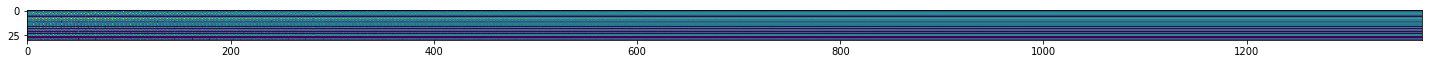

In [230]:
N = 2
i = 4
size = 25
average = False
datum = reps_recon[i].data
if average:
    datum = np.asarray(np.split(datum[:,:-(datum.shape[1] % N)], N, axis=1)).mean(axis=0)
else:
    datum = datum[:,::N]
ratio = datum.shape[0]/datum.shape[1]
fig, ax = plt.subplots(figsize=(size,ratio*size))
ax.imshow(datum, aspect='auto')
aud1 = play(wavs[i])
aud2 = play(recon[i])

(30, 1077)


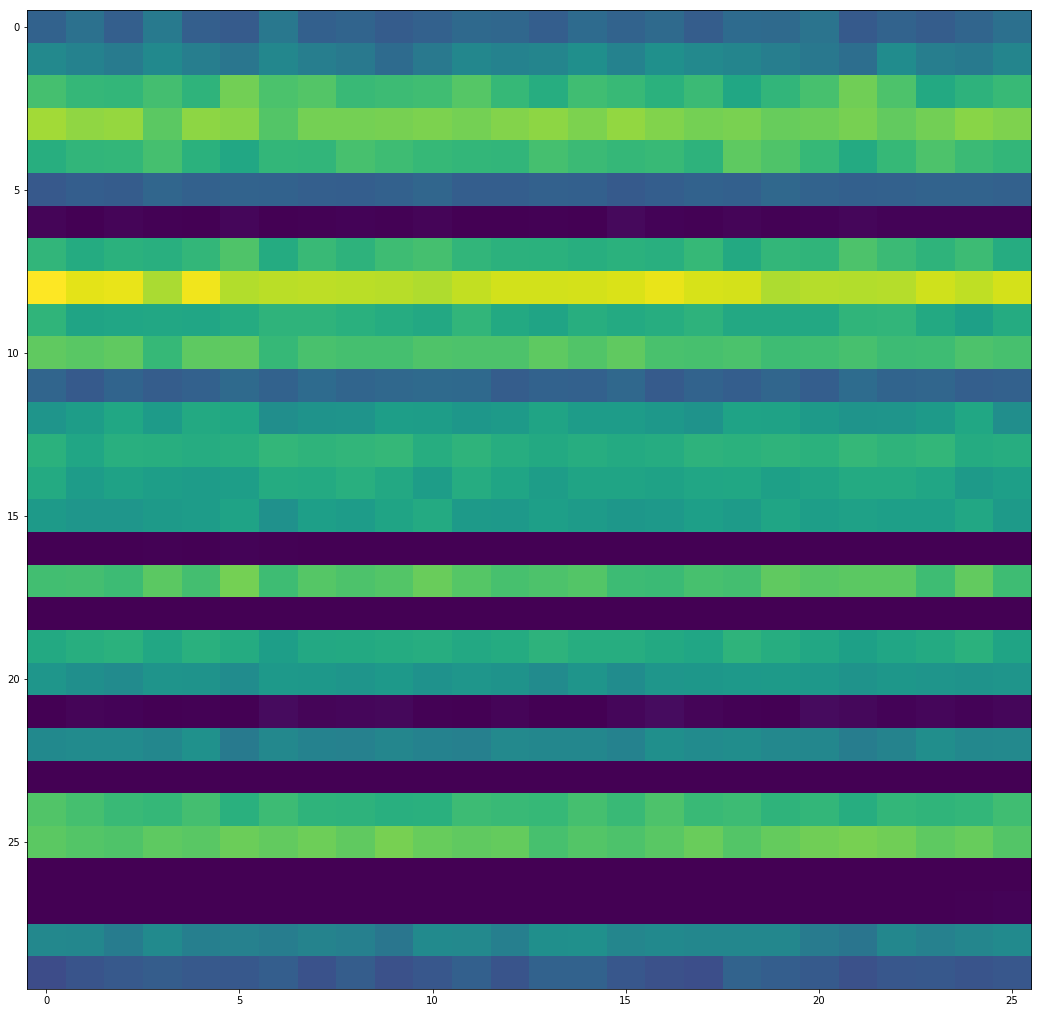

In [217]:
for 